In [9]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
hour = pd.read_csv('/content/drive/My Drive/hour.csv')
print(hour.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.7

In [10]:
print(hour['count'].mean())

189.46308763450142


In [11]:
print(hour['count'].median())
print(hour['count'].std())
print(hour['registered'].min())
print(hour['registered'].max())

142.0
181.38759909186527
0
886


In [12]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [13]:
print(hour.loc[3,'count'])

13


In [14]:
print(hour.loc[2:4,'registered'])

2    27
3    10
4     1
Name: registered, dtype: int64


In [15]:
print(hour.loc[hour['hr']<5,'registered'].mean())

20.7881427367238


In [16]:
print(hour.loc[(hour['hr']<5) & (hour['temp']<.50),'count'].mean())
print(hour.loc[(hour['hr']<5) & (hour['temp']>.50),'count'].mean())

19.521104742053154
33.639322916666664


In [17]:
print(hour.loc[(hour['temp']>0.5) | (hour['hum']>0.5),'count'].mean())

193.36764103264582


In [18]:
print(hour.groupby(['season'])['count'].mean())

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64


In [19]:
print(hour.groupby(['season','holiday'])['count'].mean())

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


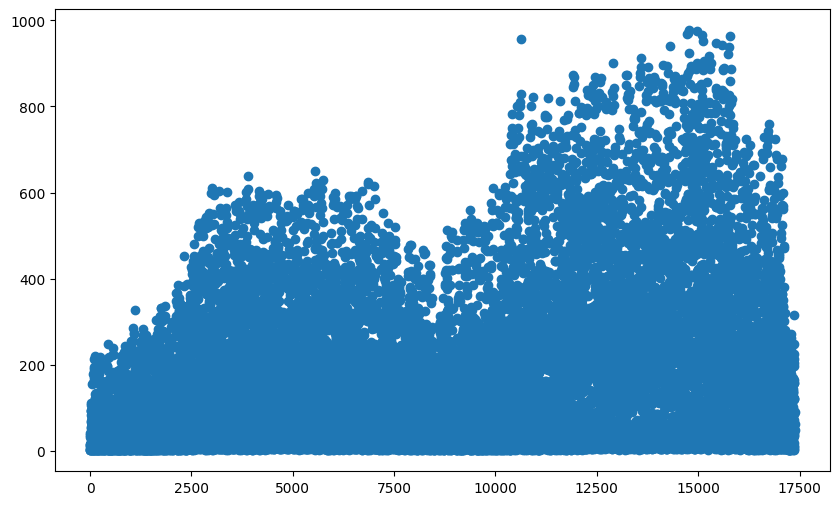

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.show()

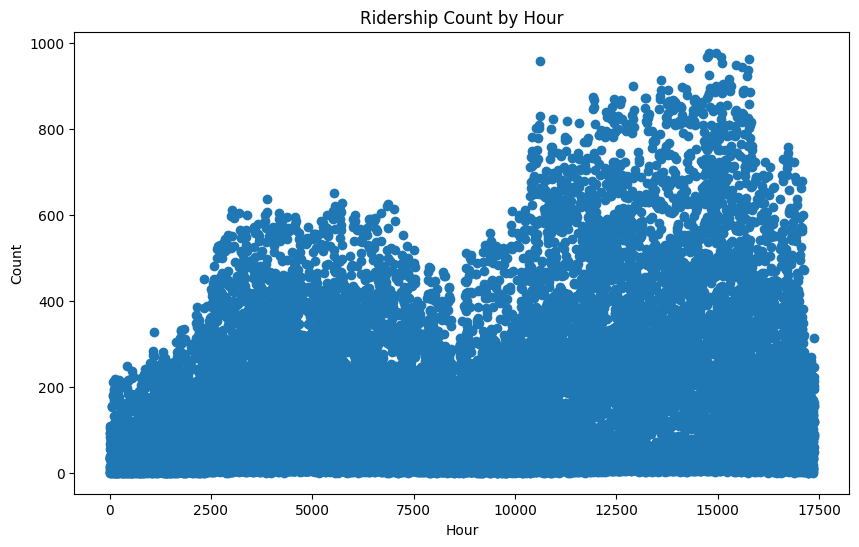

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

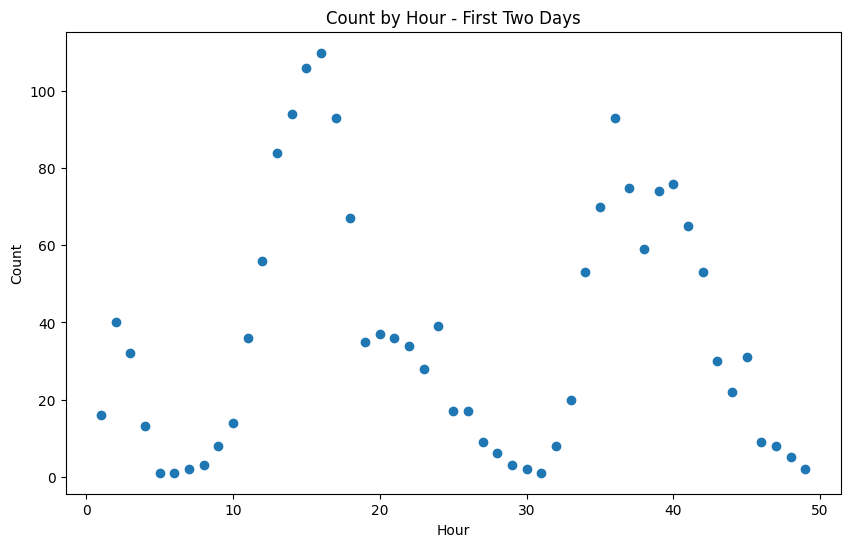

In [22]:
hour_first48=hour.loc[0:48,:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

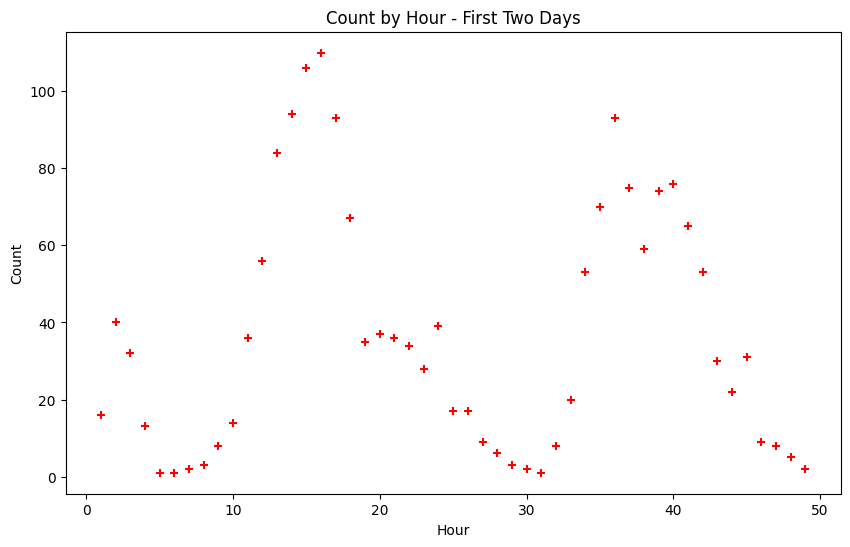

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'],c='red',marker='+')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

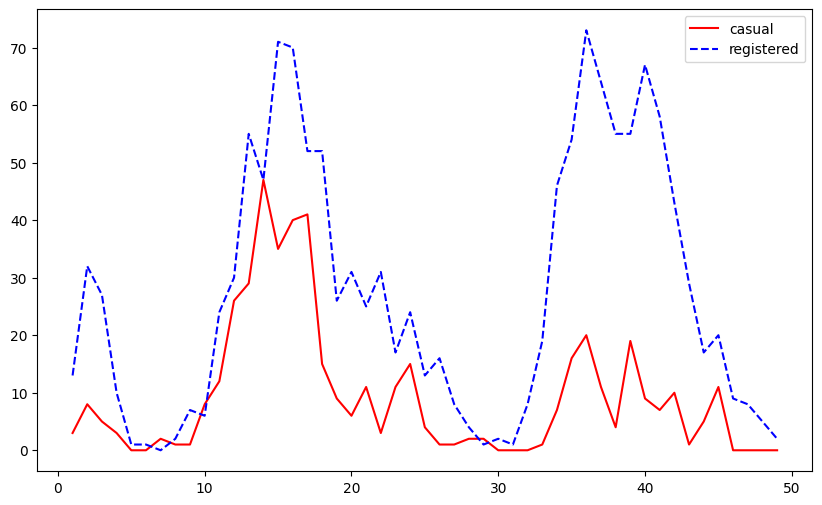

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hour_first48['instant'], hour_first48['casual'],c='red',label='casual',linestyle='-')
ax.plot(hour_first48['instant'],\
hour_first48['registered'],c='blue',label='registered',linestyle='--')
ax.legend()
plt.show()

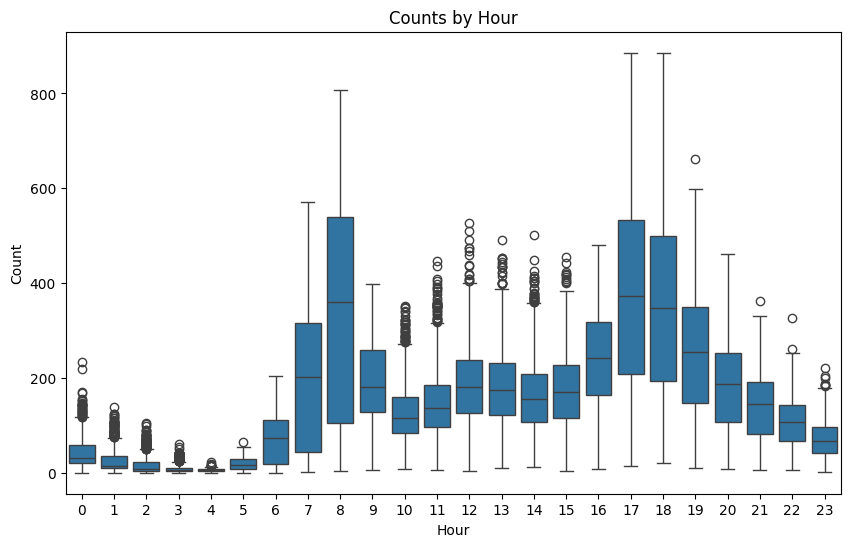

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='hr', y='registered', data=hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

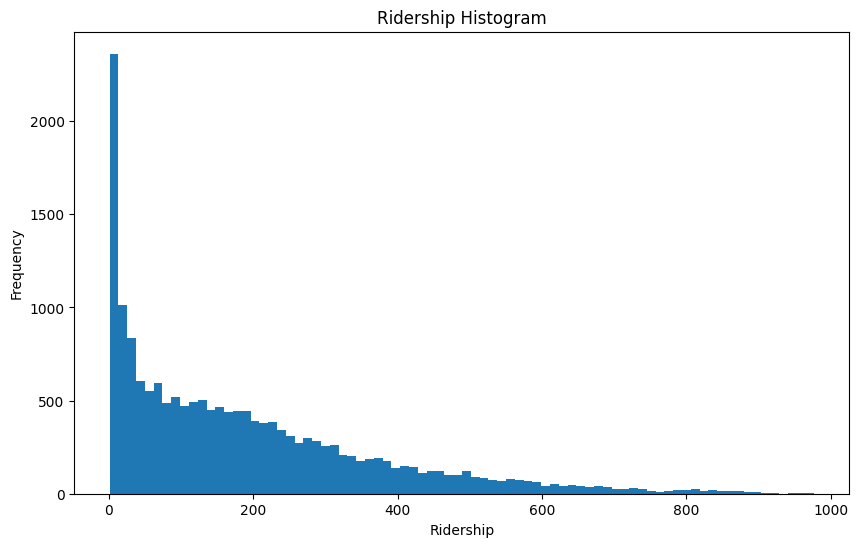

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(hour['count'],bins=80)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

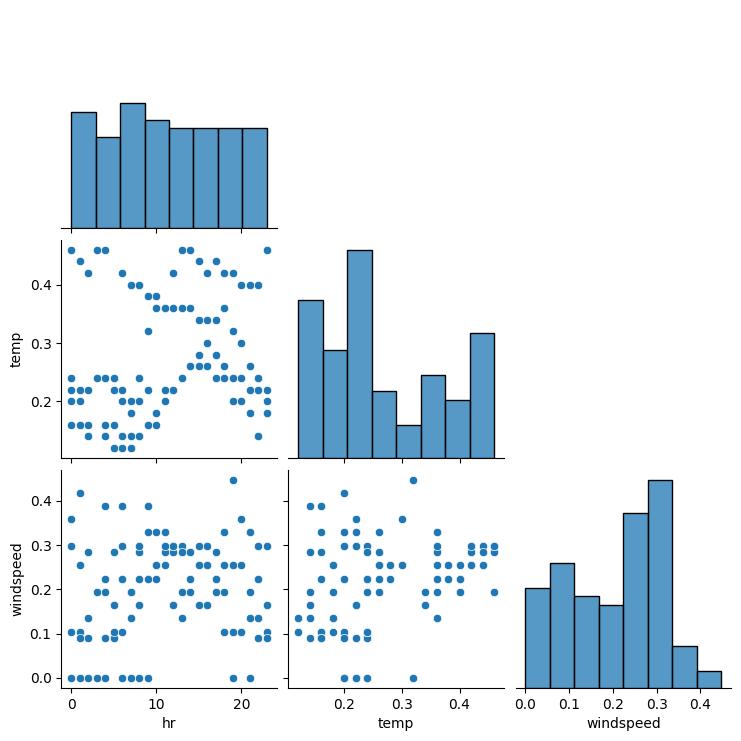

In [27]:
thevariables=['hr','temp','windspeed']
hour_first100=hour.loc[0:100,thevariables]
sns.pairplot(hour_first100, corner=True)
plt.show()

In [28]:
print(hour['casual'].corr(hour['registered']))
print(hour['temp'].corr(hour['hum']))

0.5066177004294634
-0.06988139105119354


In [29]:
thenames=['hr','temp','windspeed']
cor_matrix = hour[thenames].corr()
print(cor_matrix)

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


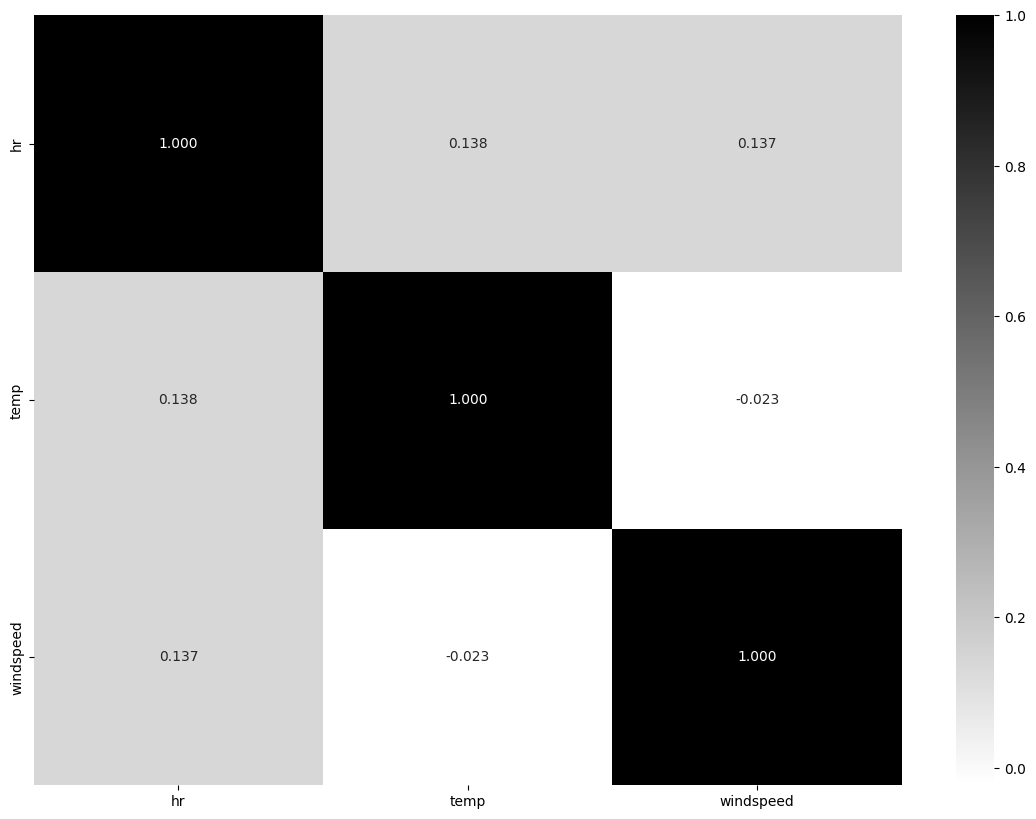

In [31]:
plt.figure(figsize=(14,10))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True,cmap='binary',
  fmt=".3f",
  xticklabels=thenames,
  yticklabels=thenames)
plt.show()

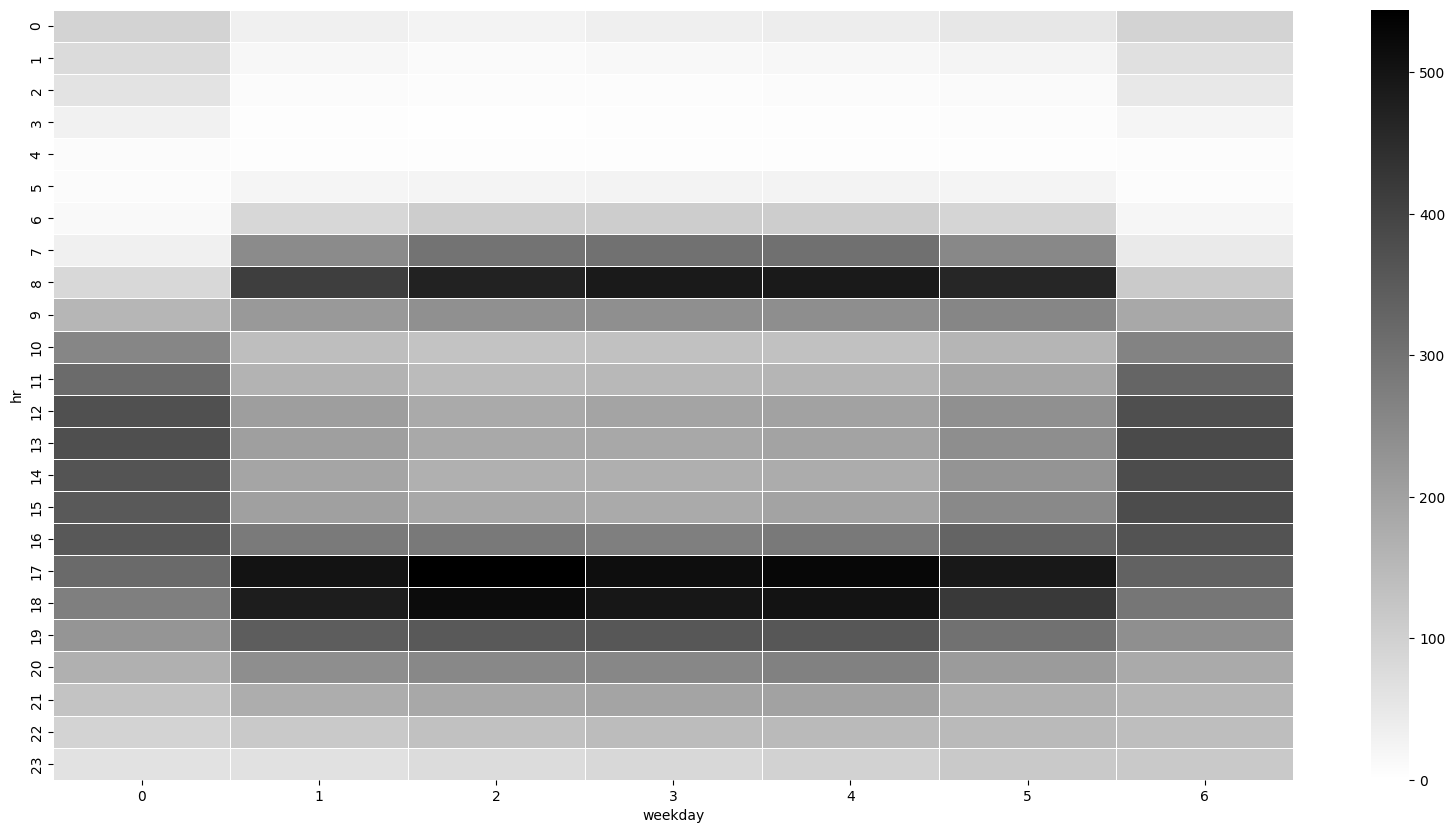

In [32]:
# Create a pivot table
df_hm =hour.pivot_table(index = 'hr',columns ='weekday',values ='count')
# Draw a heatmap
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_hm, fmt="d", cmap='binary',linewidths=.5, vmin = 0)
plt.show()

This senario introduces the role of a CEO, focusing on making informed business decisions using data. It explains how exploratory data analysis (EDA) can support business insights by showing how to read data into Python, calculate summary statistics, and interpret basic results. Additionally, the chapter demonstrates how to draw plots to visualize data trends. These foundational skills help translate raw data into meaningful business insights. The next chapter will build on this by exploring linear regression as a tool for both data exploration and forecasting.